In [1]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1.

In [3]:
def generate_dataset(size):
    dataset = np.zeros((size, size), dtype=int)
    for x in range(size):
        y_start = x
        y_end = min(y_start + (size // 2), size)  # Ensure not to exceed row size
        dataset[x, y_start:y_end] = 1
    return pd.DataFrame(dataset)

In [8]:
datasets = {
    '4': generate_dataset(4),
    '16': generate_dataset(16),
    '256': generate_dataset(256),
}
datasets['4']

0  1  2  3
0  1  1  0  0
1  0  1  1  0
2  0  0  1  1
3  0  0  0  1

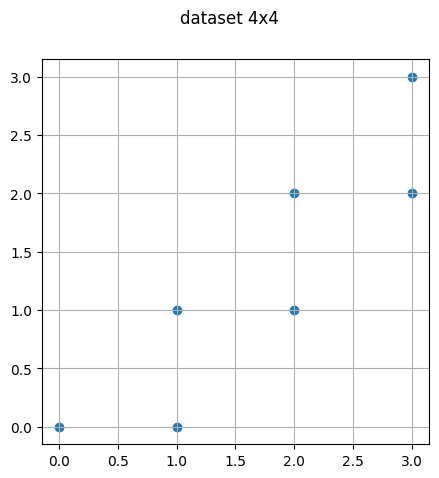

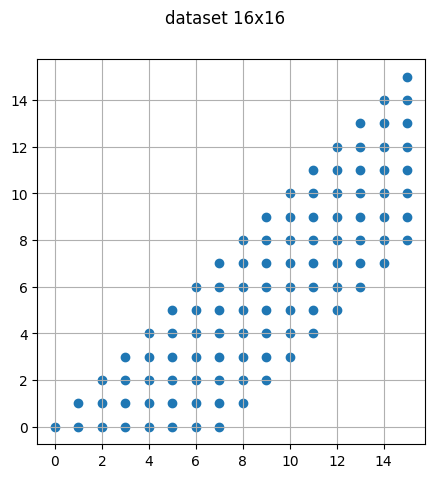

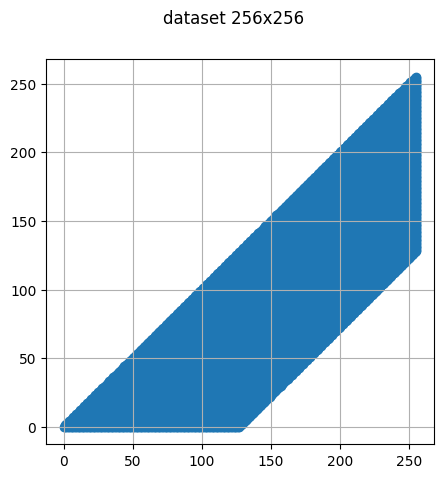

In [42]:
for name, dataset in datasets.items():
    plt.figure(figsize=(5, 5))
    plt.suptitle(f'dataset {name}x{name}')

    #plt.subplot(1, 2, 1)
    x, y = np.where(dataset.values == 1)
    plt.scatter(y, x)
    plt.grid()

    #plt.subplot(1, 2, 2)
    #plt.imshow(dataset, cmap='binary', origin='lower', extent=[0, int(name), 0, int(name)])

    plt.show()

# 2.

In [211]:
def task_2(dataset, a=6, c=200):
    dataset_scaler = StandardScaler()
    dataset_scaler.fit(dataset)
    dataset_scaled = dataset_scaler.transform(dataset)
    
    pca = PCA()
    pca.fit(dataset_scaled)

    # A) Scree plot
    explaned_variance_ratio = pca.explained_variance_ratio_
    plt.figure(figsize=(5, 5))
    #plt.suptitle(f'dataset {len(dataset)}x{len(dataset)}')

    #plt.subplot(1, 5, 1)
    plt.title(f'A) scree plot, dataset {name}x{name}')
    plt.plot(np.arange(1, len(explaned_variance_ratio) + 1), explaned_variance_ratio)
    plt.scatter(np.arange(1, len(explaned_variance_ratio) + 1), explaned_variance_ratio, color='red', s=10, alpha=0.6)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance ratio')
    plt.show()

    # B)
    plt.figure(figsize=(a*3, a*3))
    plt.suptitle(f'B) dataset {name}x{name}')

    if len(explaned_variance_ratio) < a:
           print(f'a > количество переменных  =>  a = кол-во переменных') 
    a = min(len(explaned_variance_ratio), a)
    pca = PCA(n_components=a)
    pca.fit(dataset_scaled)
    pca_result = pca.transform(dataset)
    for i in range(a):
        for j in range(a):
            plt.subplot(a, a, i*a+j+1)
            plt.scatter(pca_result[:, i], pca_result[:, j], color='blue', s=10)
            plt.xlabel(f'компонента {i+1}')
            plt.ylabel(f'компонента {j+1}')
            plt.grid()
            plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # C)
    plt.figure(figsize=(a*3, a*3))
    plt.suptitle(f'C) dataset {name}x{name}')

    if len(explaned_variance_ratio) < c+a:
           print(f'a > количество переменных  =>  a = кол-во переменных') 
    a = min(len(explaned_variance_ratio), a)
    pca = PCA(n_components=a)
    pca.fit(dataset_scaled)
    pca_result = pca.transform(dataset)
    lim_value = 0
    for i in range(a):
        for j in range(a):
            plt.subplot(a, a, i*a+j+1)
            plt.scatter(pca_result[:, i], pca_result[:, j], color='blue', s=10)
            for k in range(dataset.shape[1]): # Векторы
                 x, y = pca.components_[i, k], pca.components_[j, k]
                 length = np.linalg.norm([x, y])
                 lim_value = 0#max(lim_value, length)
                 plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1/dataset.shape[1]*4, linewidth=0.1, alpha=0.5, color='red') #scale=1/dataset.shape[1]*4
            plt.xlabel(f'компонента {i+1}')
            plt.ylabel(f'компонента {j+1}')
            lim_value = max(lim_value, np.max(np.abs(pca_result)))
            plt.xlim([-lim_value-1, lim_value+1])
            plt.ylim([-lim_value-1, lim_value+1])
            plt.grid()
            plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # D)
    plt.figure(figsize=(a*3, a*3))
    plt.suptitle(f'D) dataset {name}x{name}')

    if len(explaned_variance_ratio) < c+a:
           print(f'c+a > количество переменных  =>  break')
           return
    a = min(len(explaned_variance_ratio), a)
    pca = PCA(n_components=c+a)
    pca.fit(dataset_scaled)
    pca_result = pca.transform(dataset)
    for i in range(c, c+a):
        for j in range(c, c+a):
            plt.subplot(a, a, (i-c)*a+(j-c)+1)
            plt.scatter(pca_result[:, i], pca_result[:, j], color='blue', s=10)
            plt.xlabel(f'компонента {i+1}')
            plt.ylabel(f'компонента {j+1}')
            plt.grid()
            plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)
            
    plt.tight_layout()
    plt.show()

    # E)
    plt.figure(figsize=(a*3, a*3))
    plt.suptitle(f'E) dataset {name}x{name}')

    if len(explaned_variance_ratio) < a:
           print(f'c+a > количество переменных  =>  break')
           return  
    a = min(len(explaned_variance_ratio), a)
    pca = PCA(n_components=c+a)
    pca.fit(dataset_scaled)
    pca_result = pca.transform(dataset)
    lim_value = 0
    for i in range(c, c+a):
        for j in range(c, c+a):
            plt.subplot(a, a, (i-c)*a+(j-c)+1)
            plt.scatter(pca_result[:, i], pca_result[:, j], color='blue', s=10)
            for k in range(dataset.shape[1]): # Векторы
                 x, y = pca.components_[i, k], pca.components_[j, k]
                 length = np.linalg.norm([x, y])
                 lim_value = 0#max(lim_value, length)
                 plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1/dataset.shape[1]*4, linewidth=0.1, alpha=0.5, color='red') #scale=1/dataset.shape[1]*4
            plt.xlabel(f'компонента {i+1}')
            plt.ylabel(f'компонента {j+1}')
            lim_value = max(lim_value, np.max(np.abs(pca_result)))
            plt.xlim([-lim_value-1, lim_value+1])
            plt.ylim([-lim_value-1, lim_value+1])
            plt.grid()
            plt.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            plt.axvline(0, color='gray', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.show()

dataset 4x4


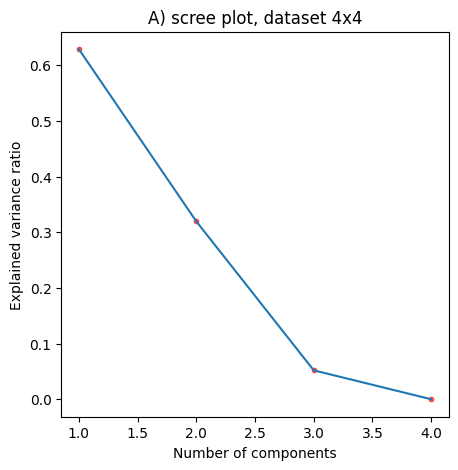

a > количество переменных  =>  a = кол-во переменных


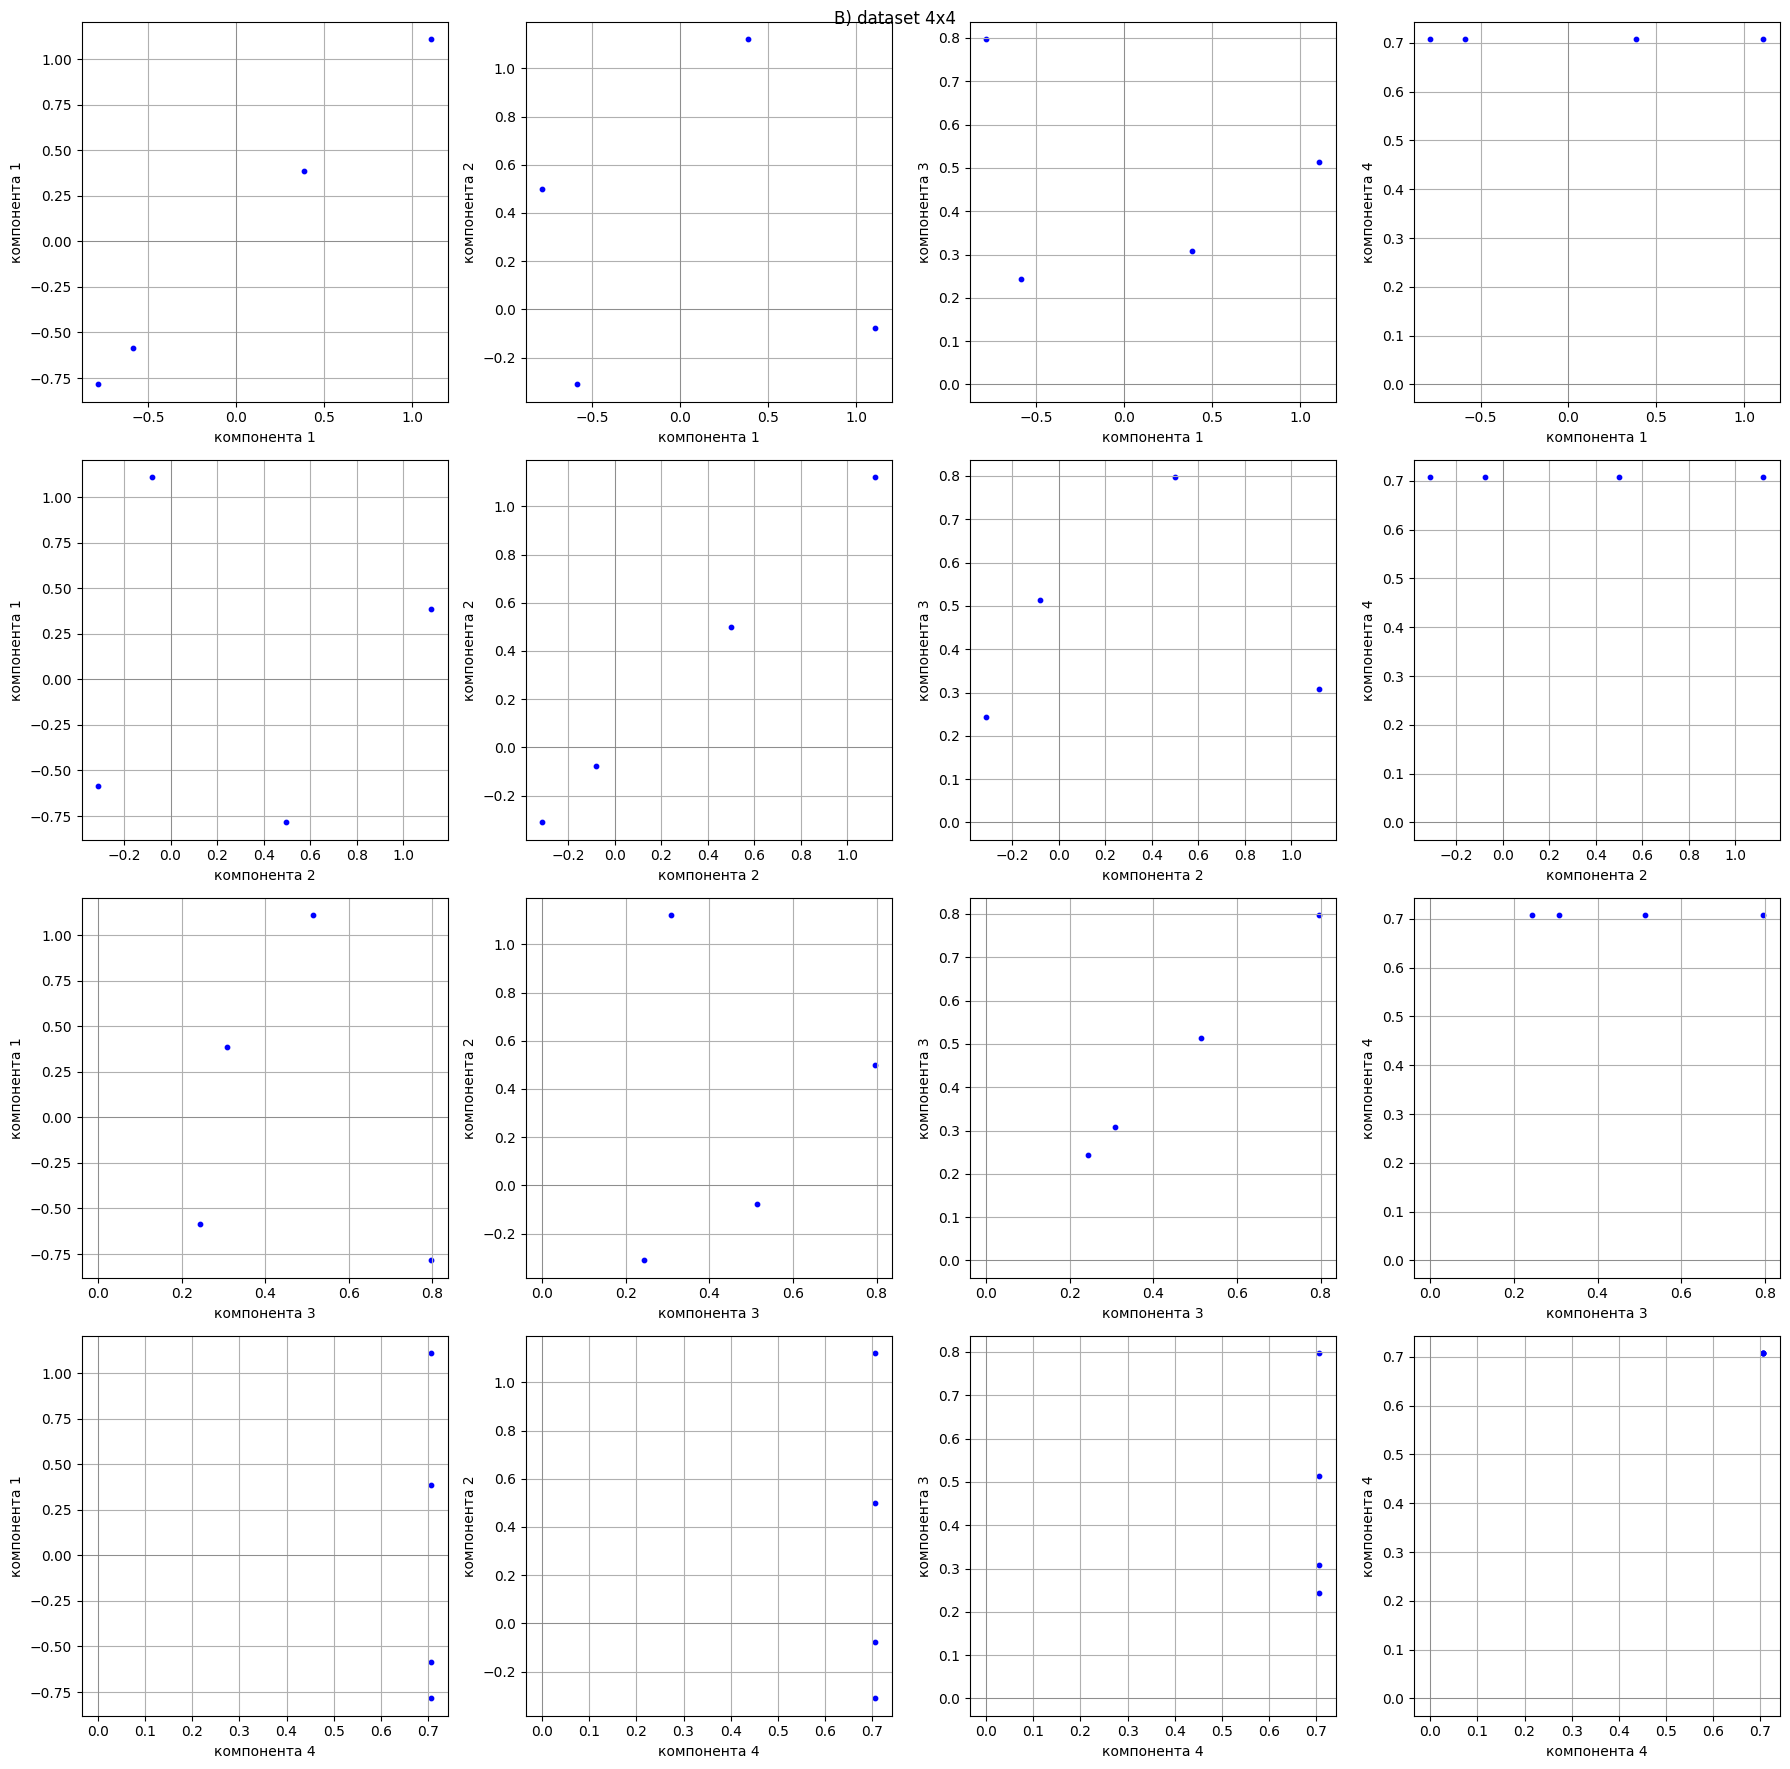

a > количество переменных  =>  a = кол-во переменных


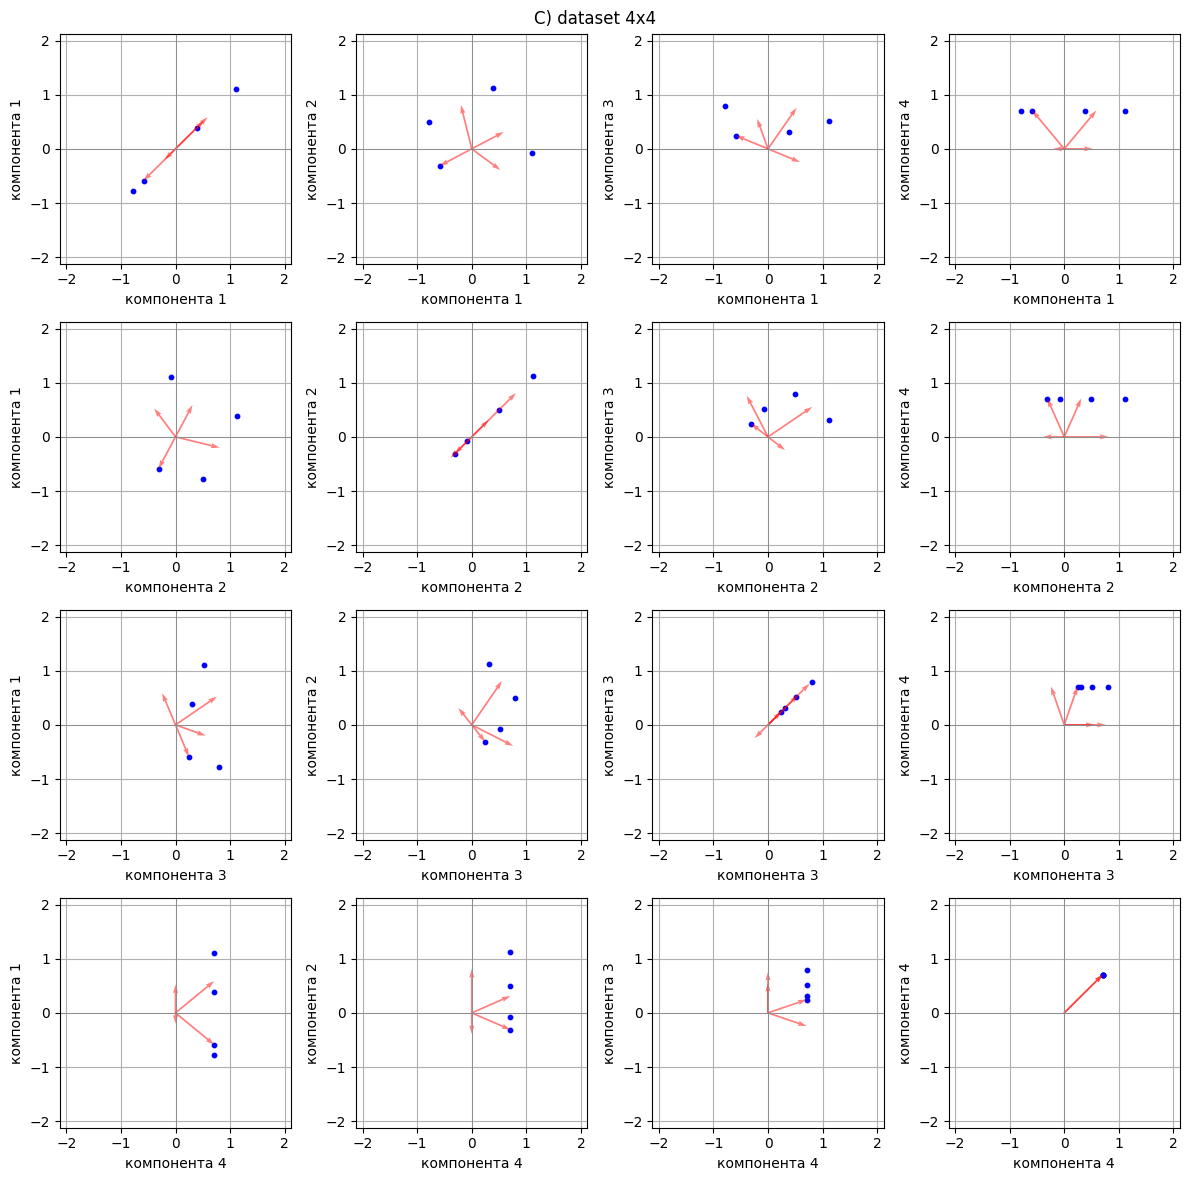

c+a > количество переменных  =>  break
dataset 16x16


<Figure size 1200x1200 with 0 Axes>

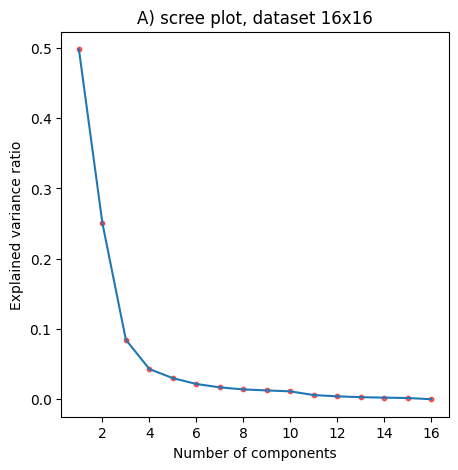

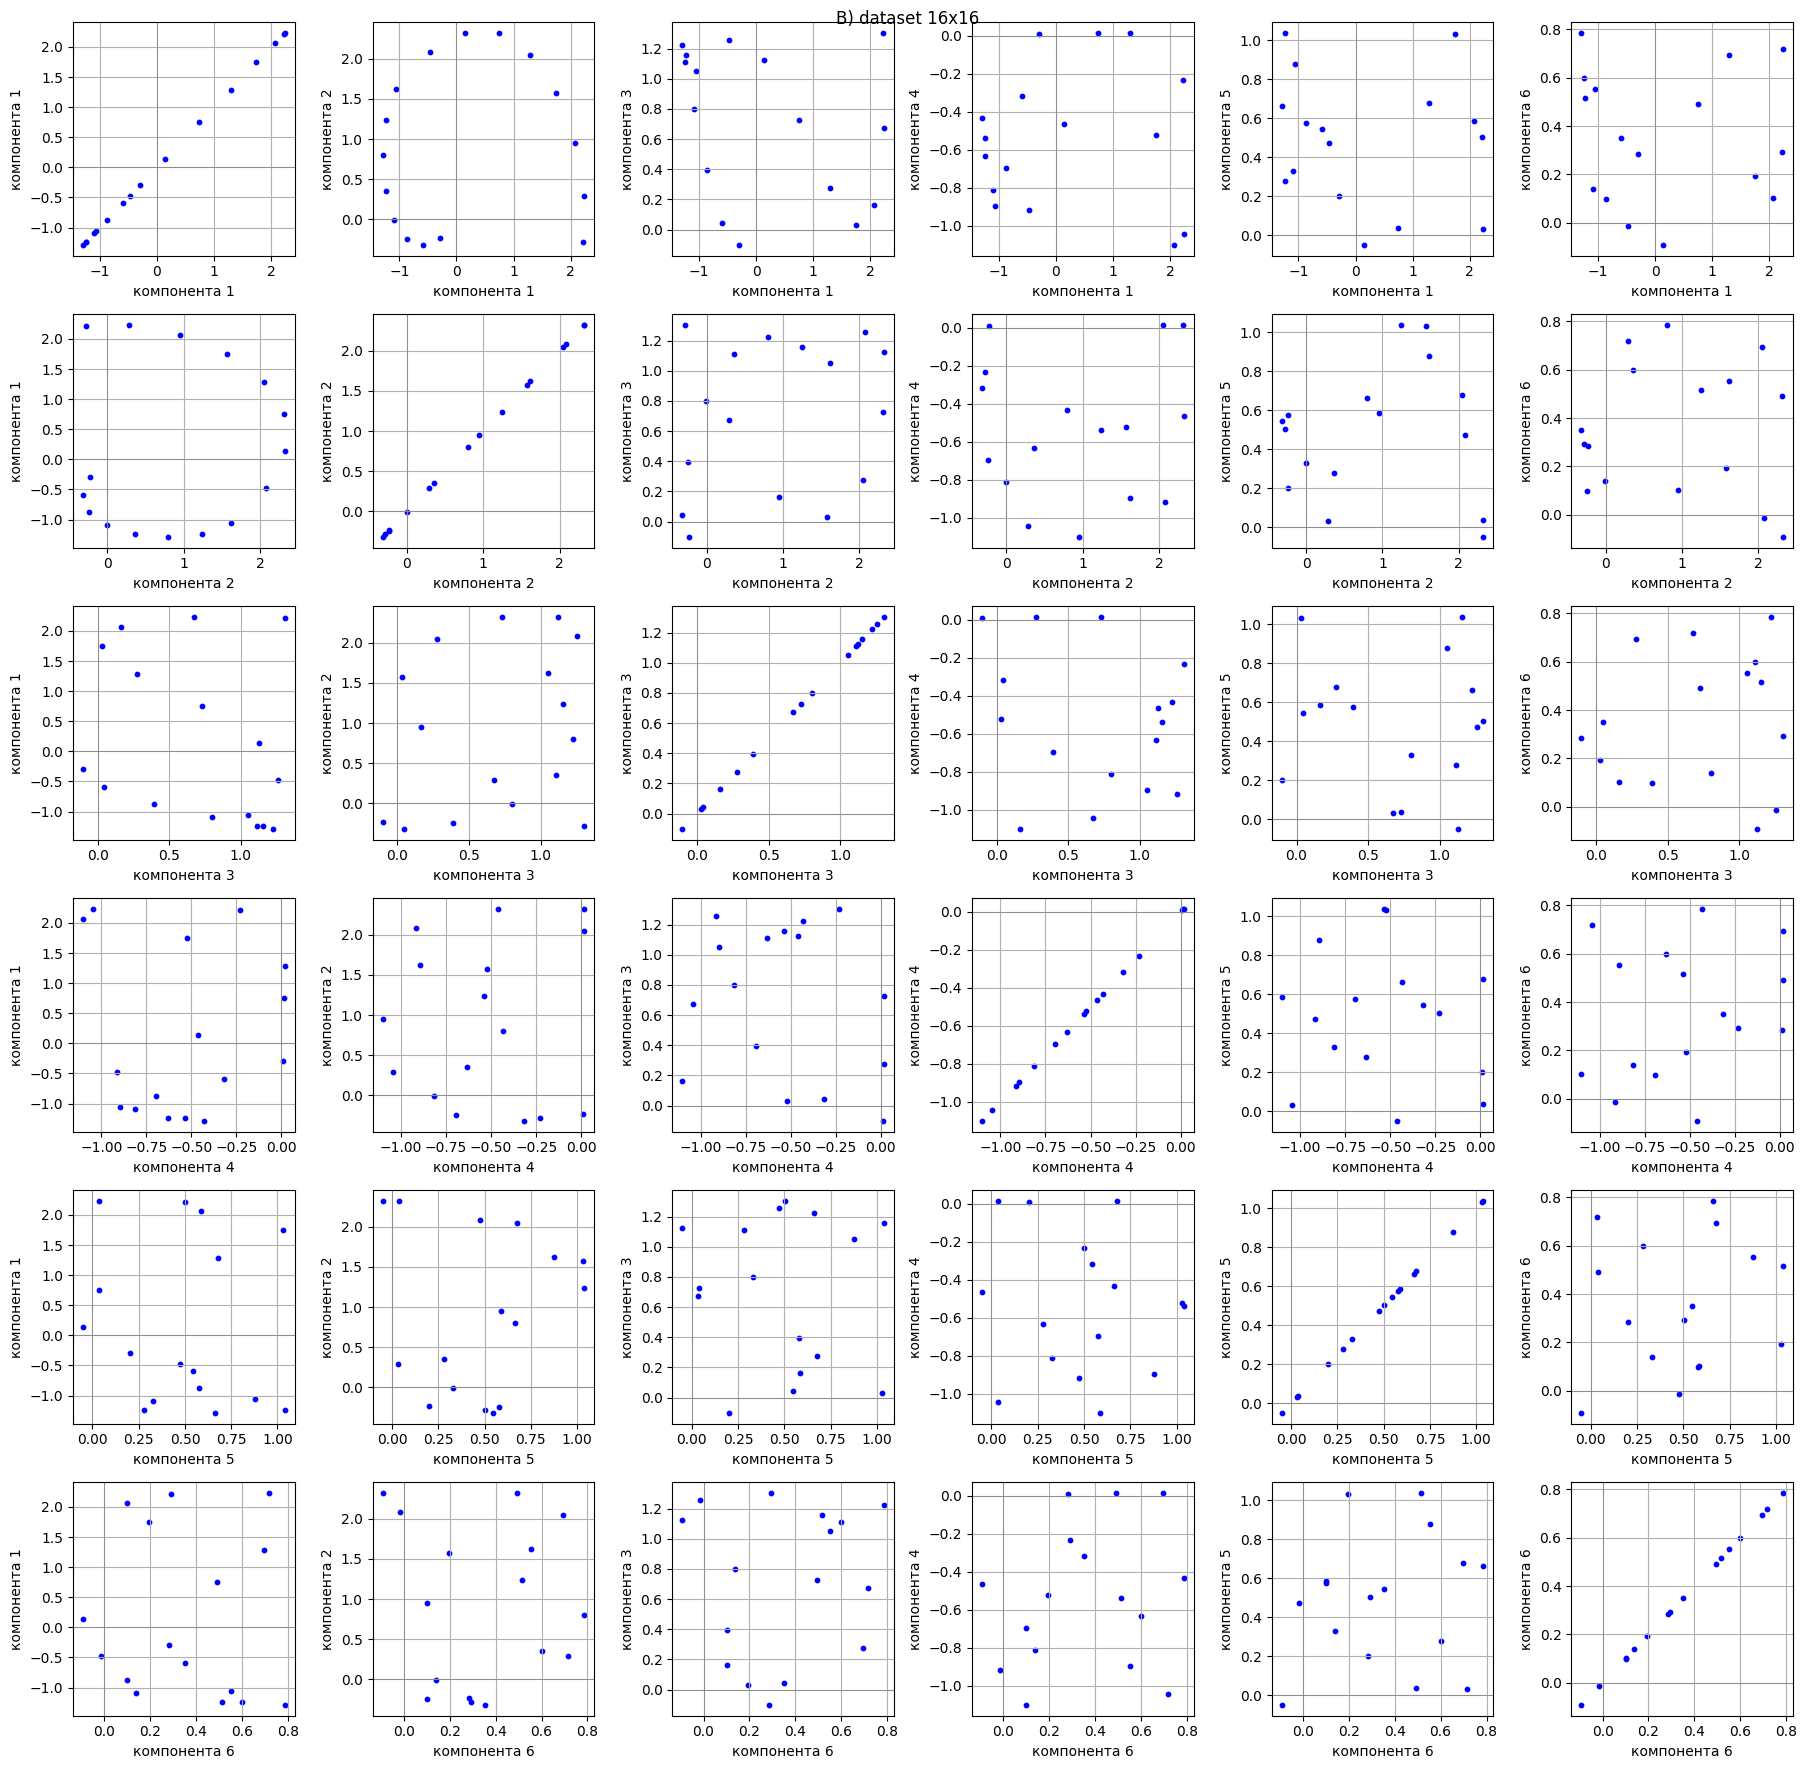

a > количество переменных  =>  a = кол-во переменных


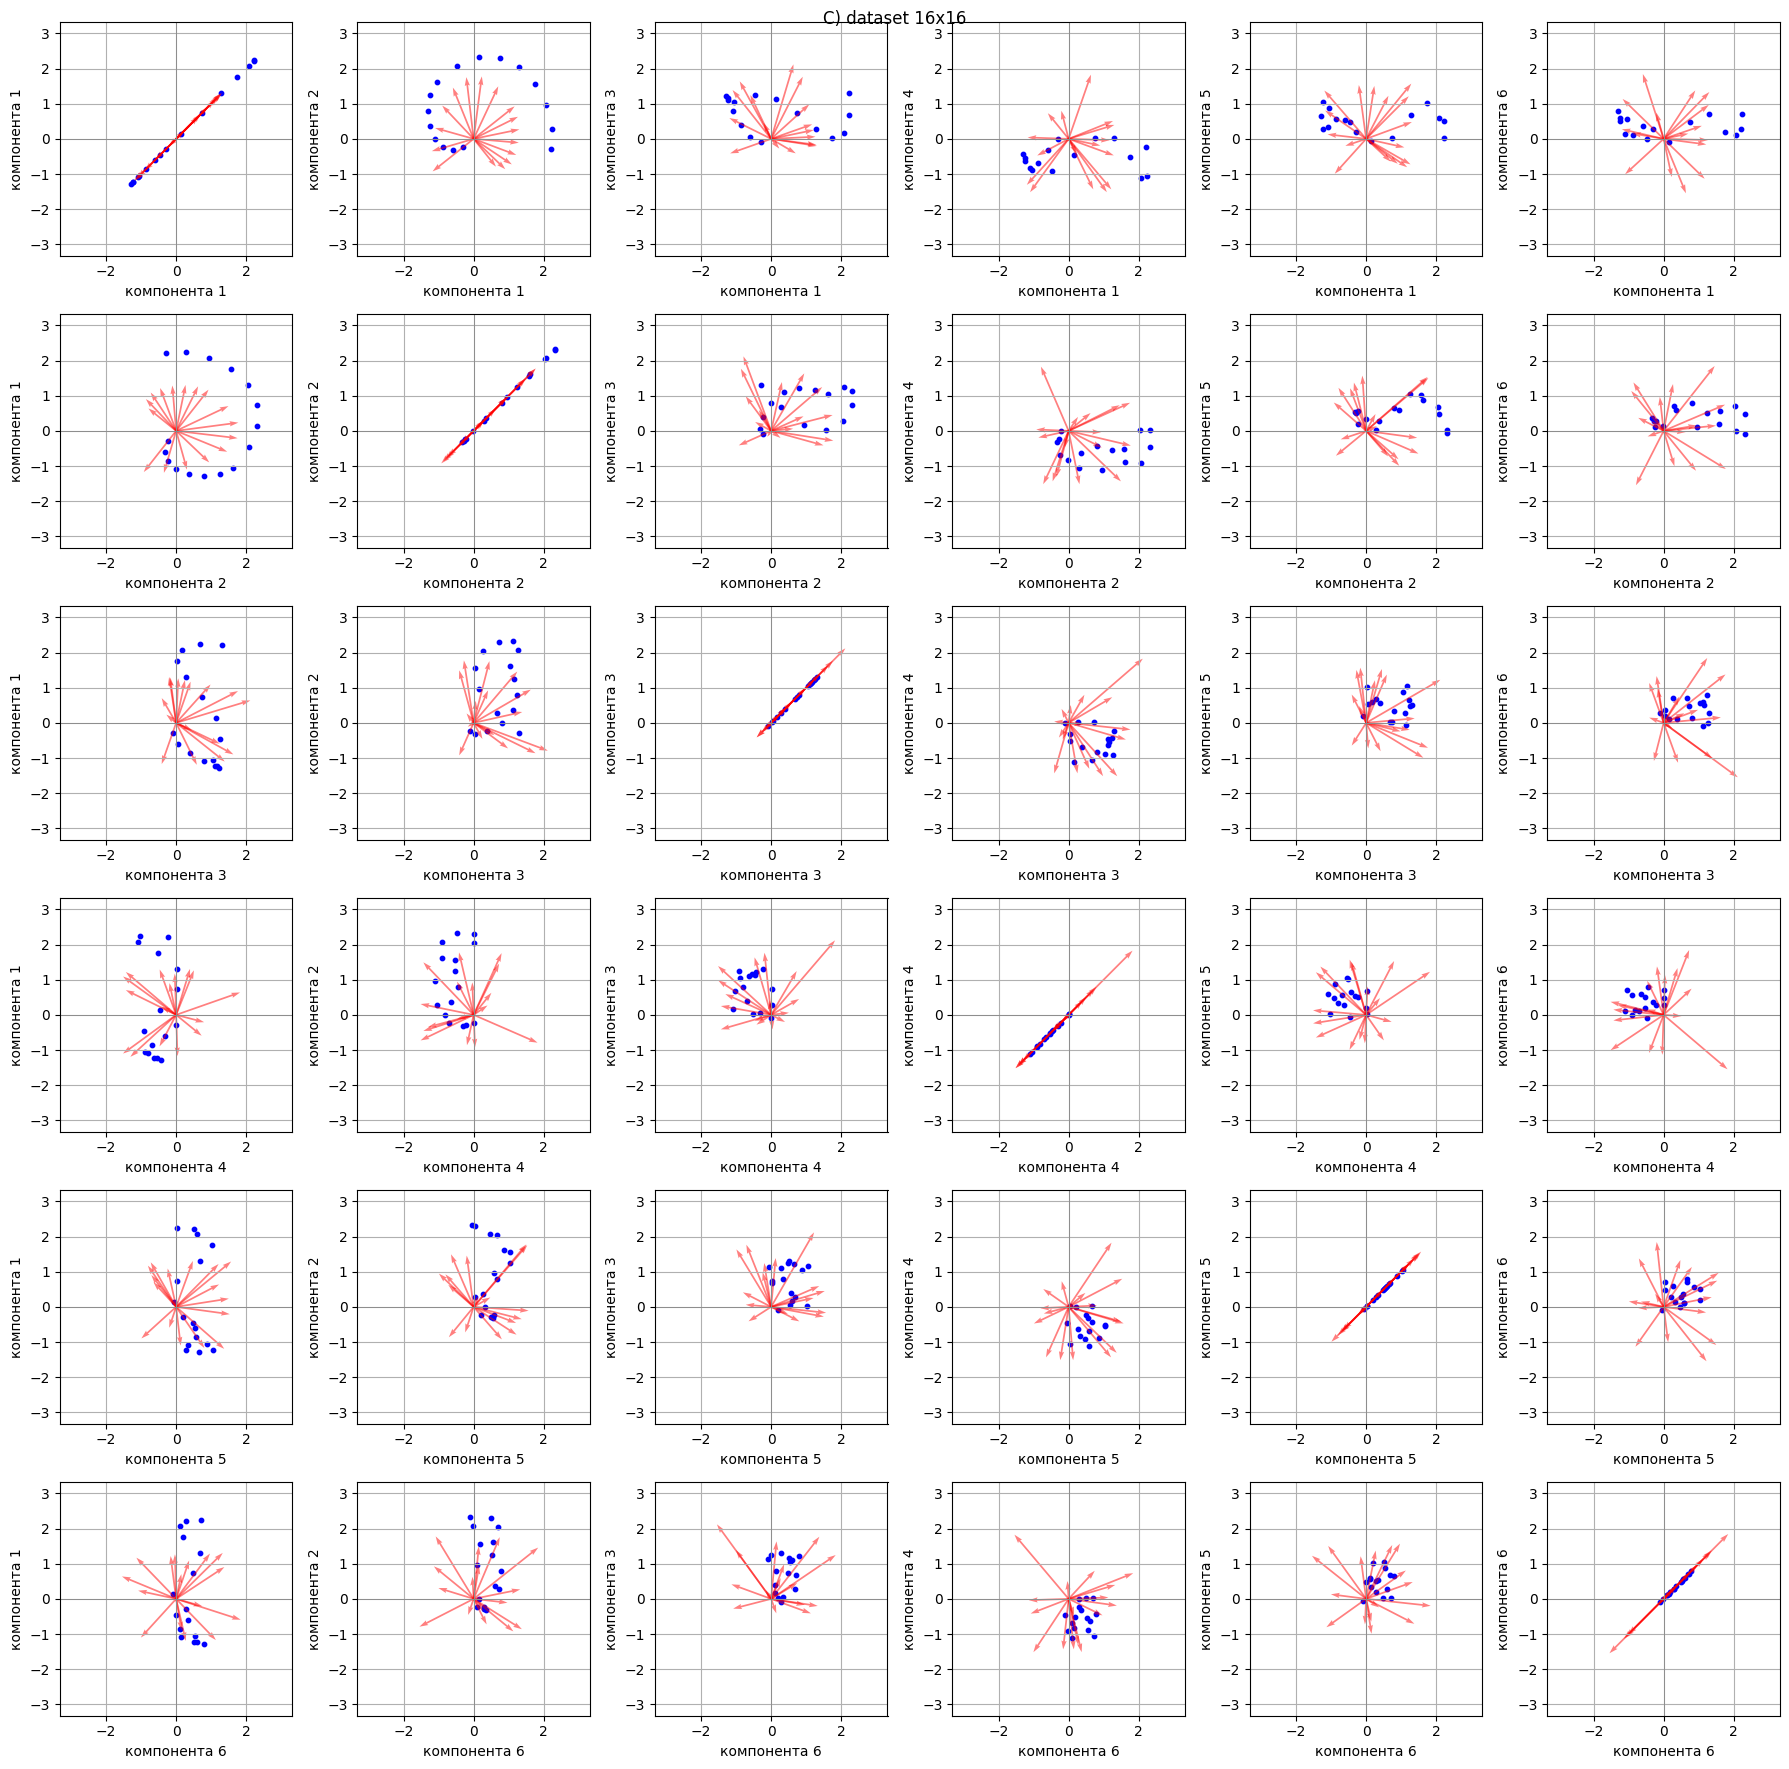

c+a > количество переменных  =>  break
dataset 256x256


<Figure size 1800x1800 with 0 Axes>

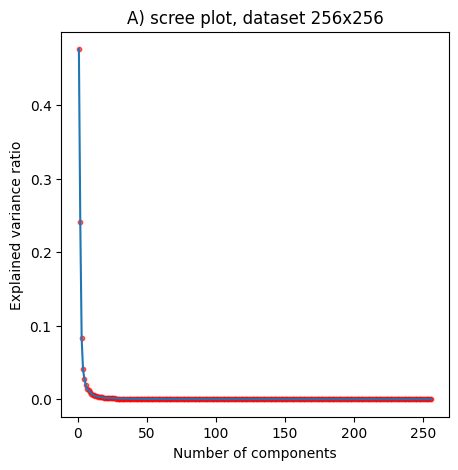

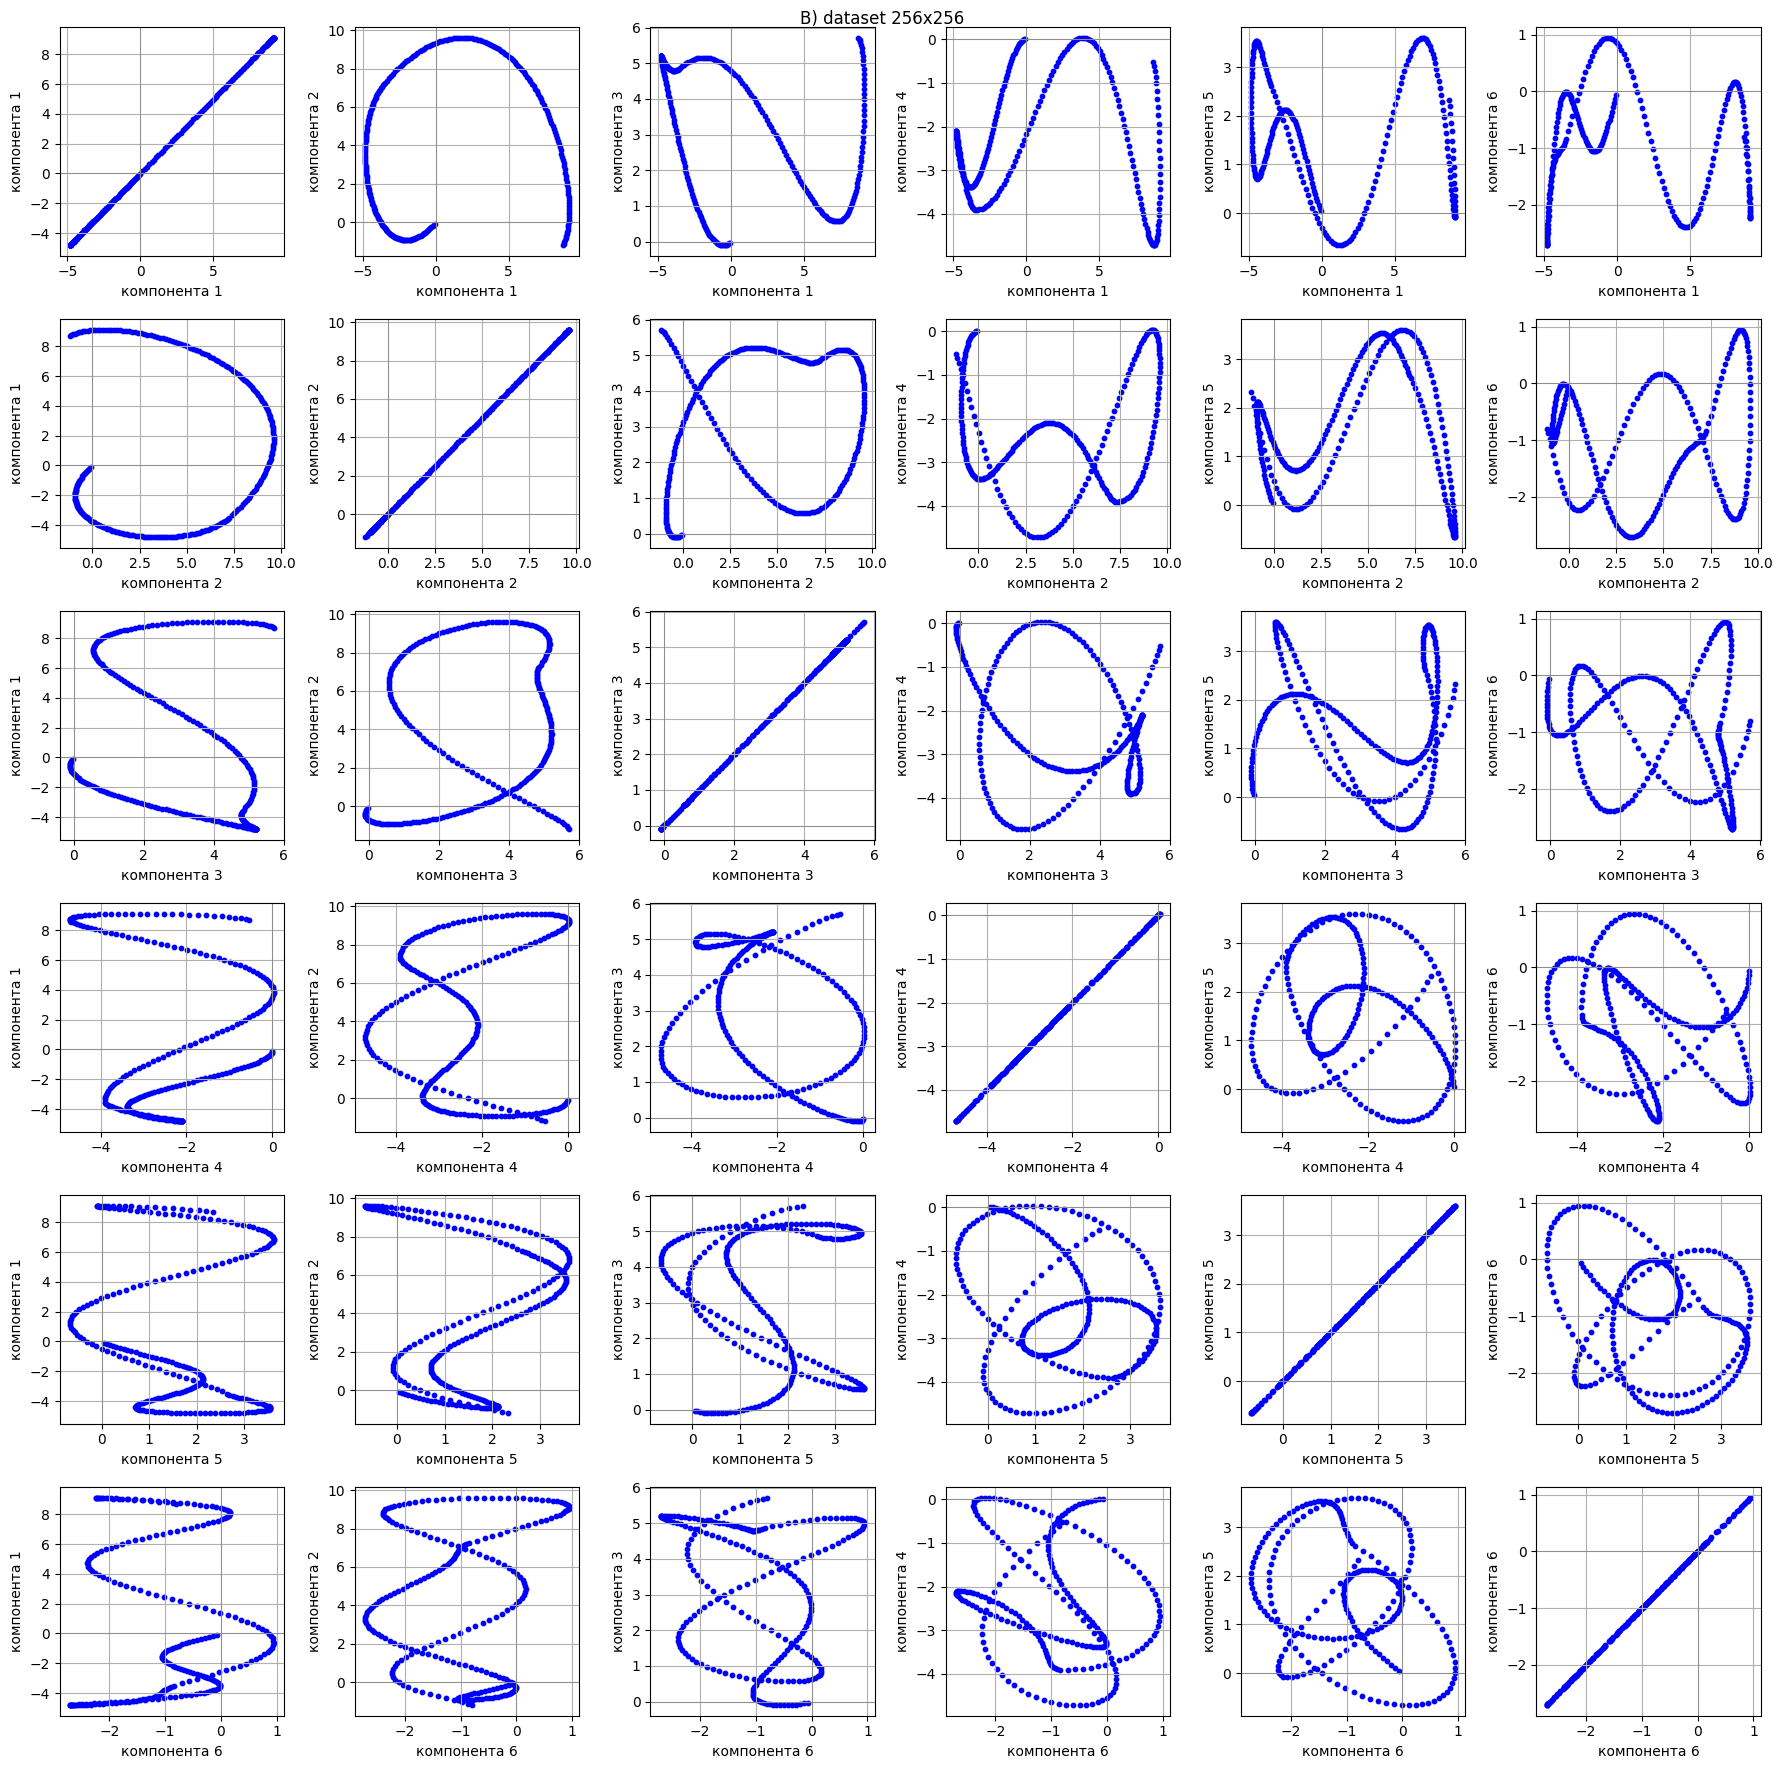

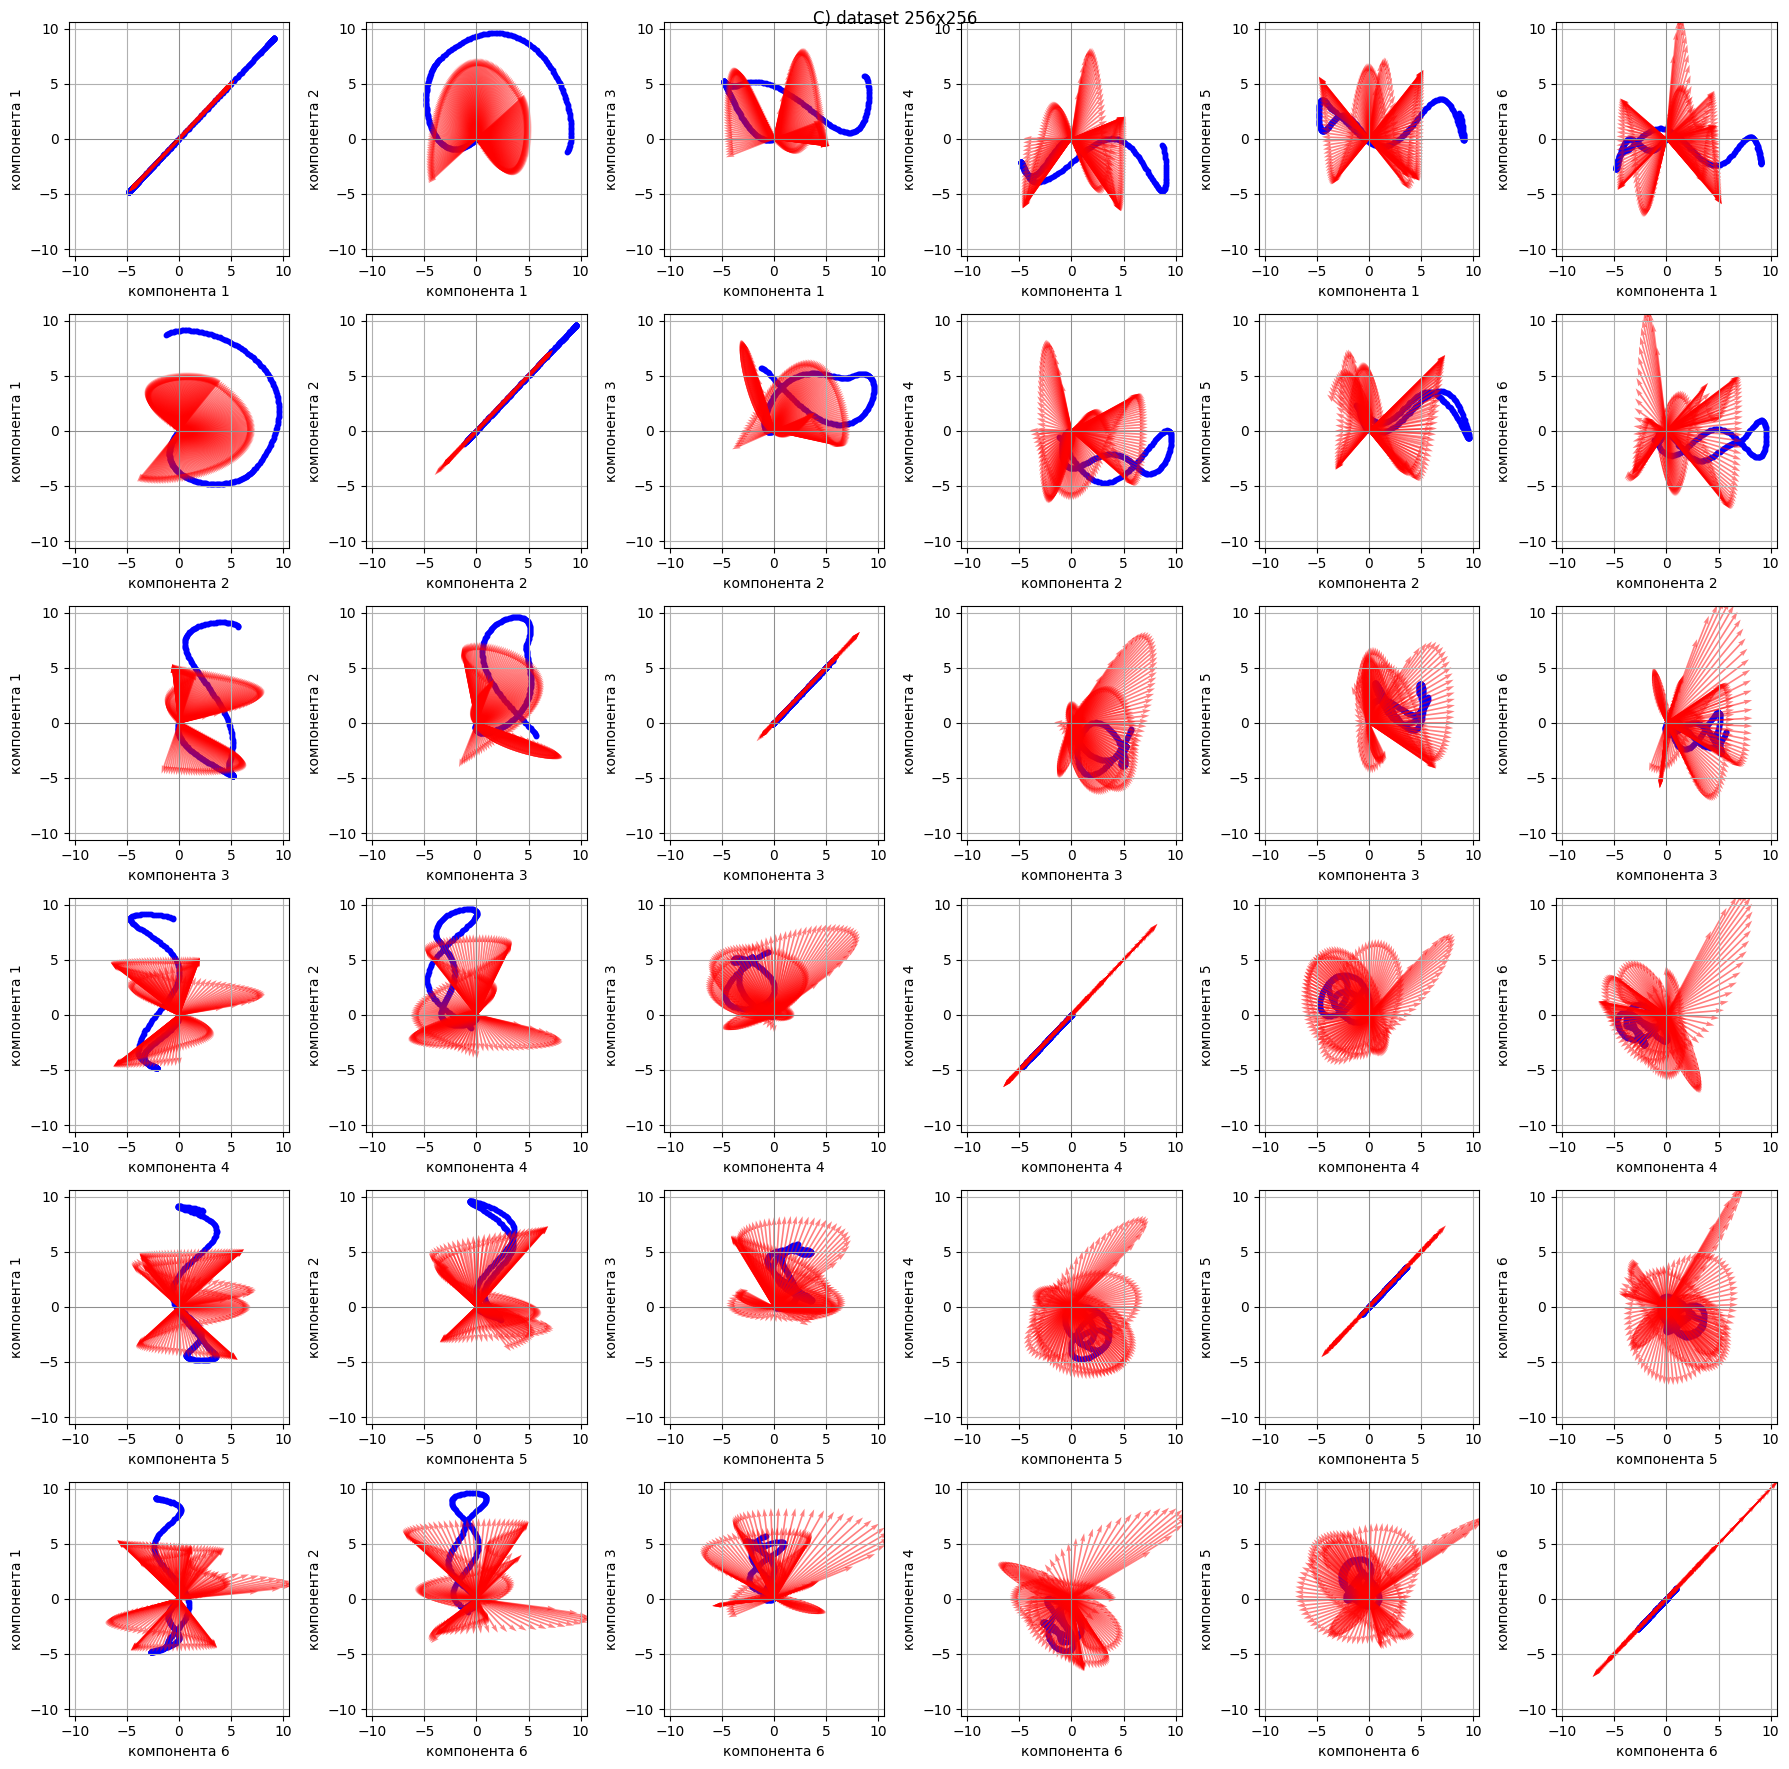

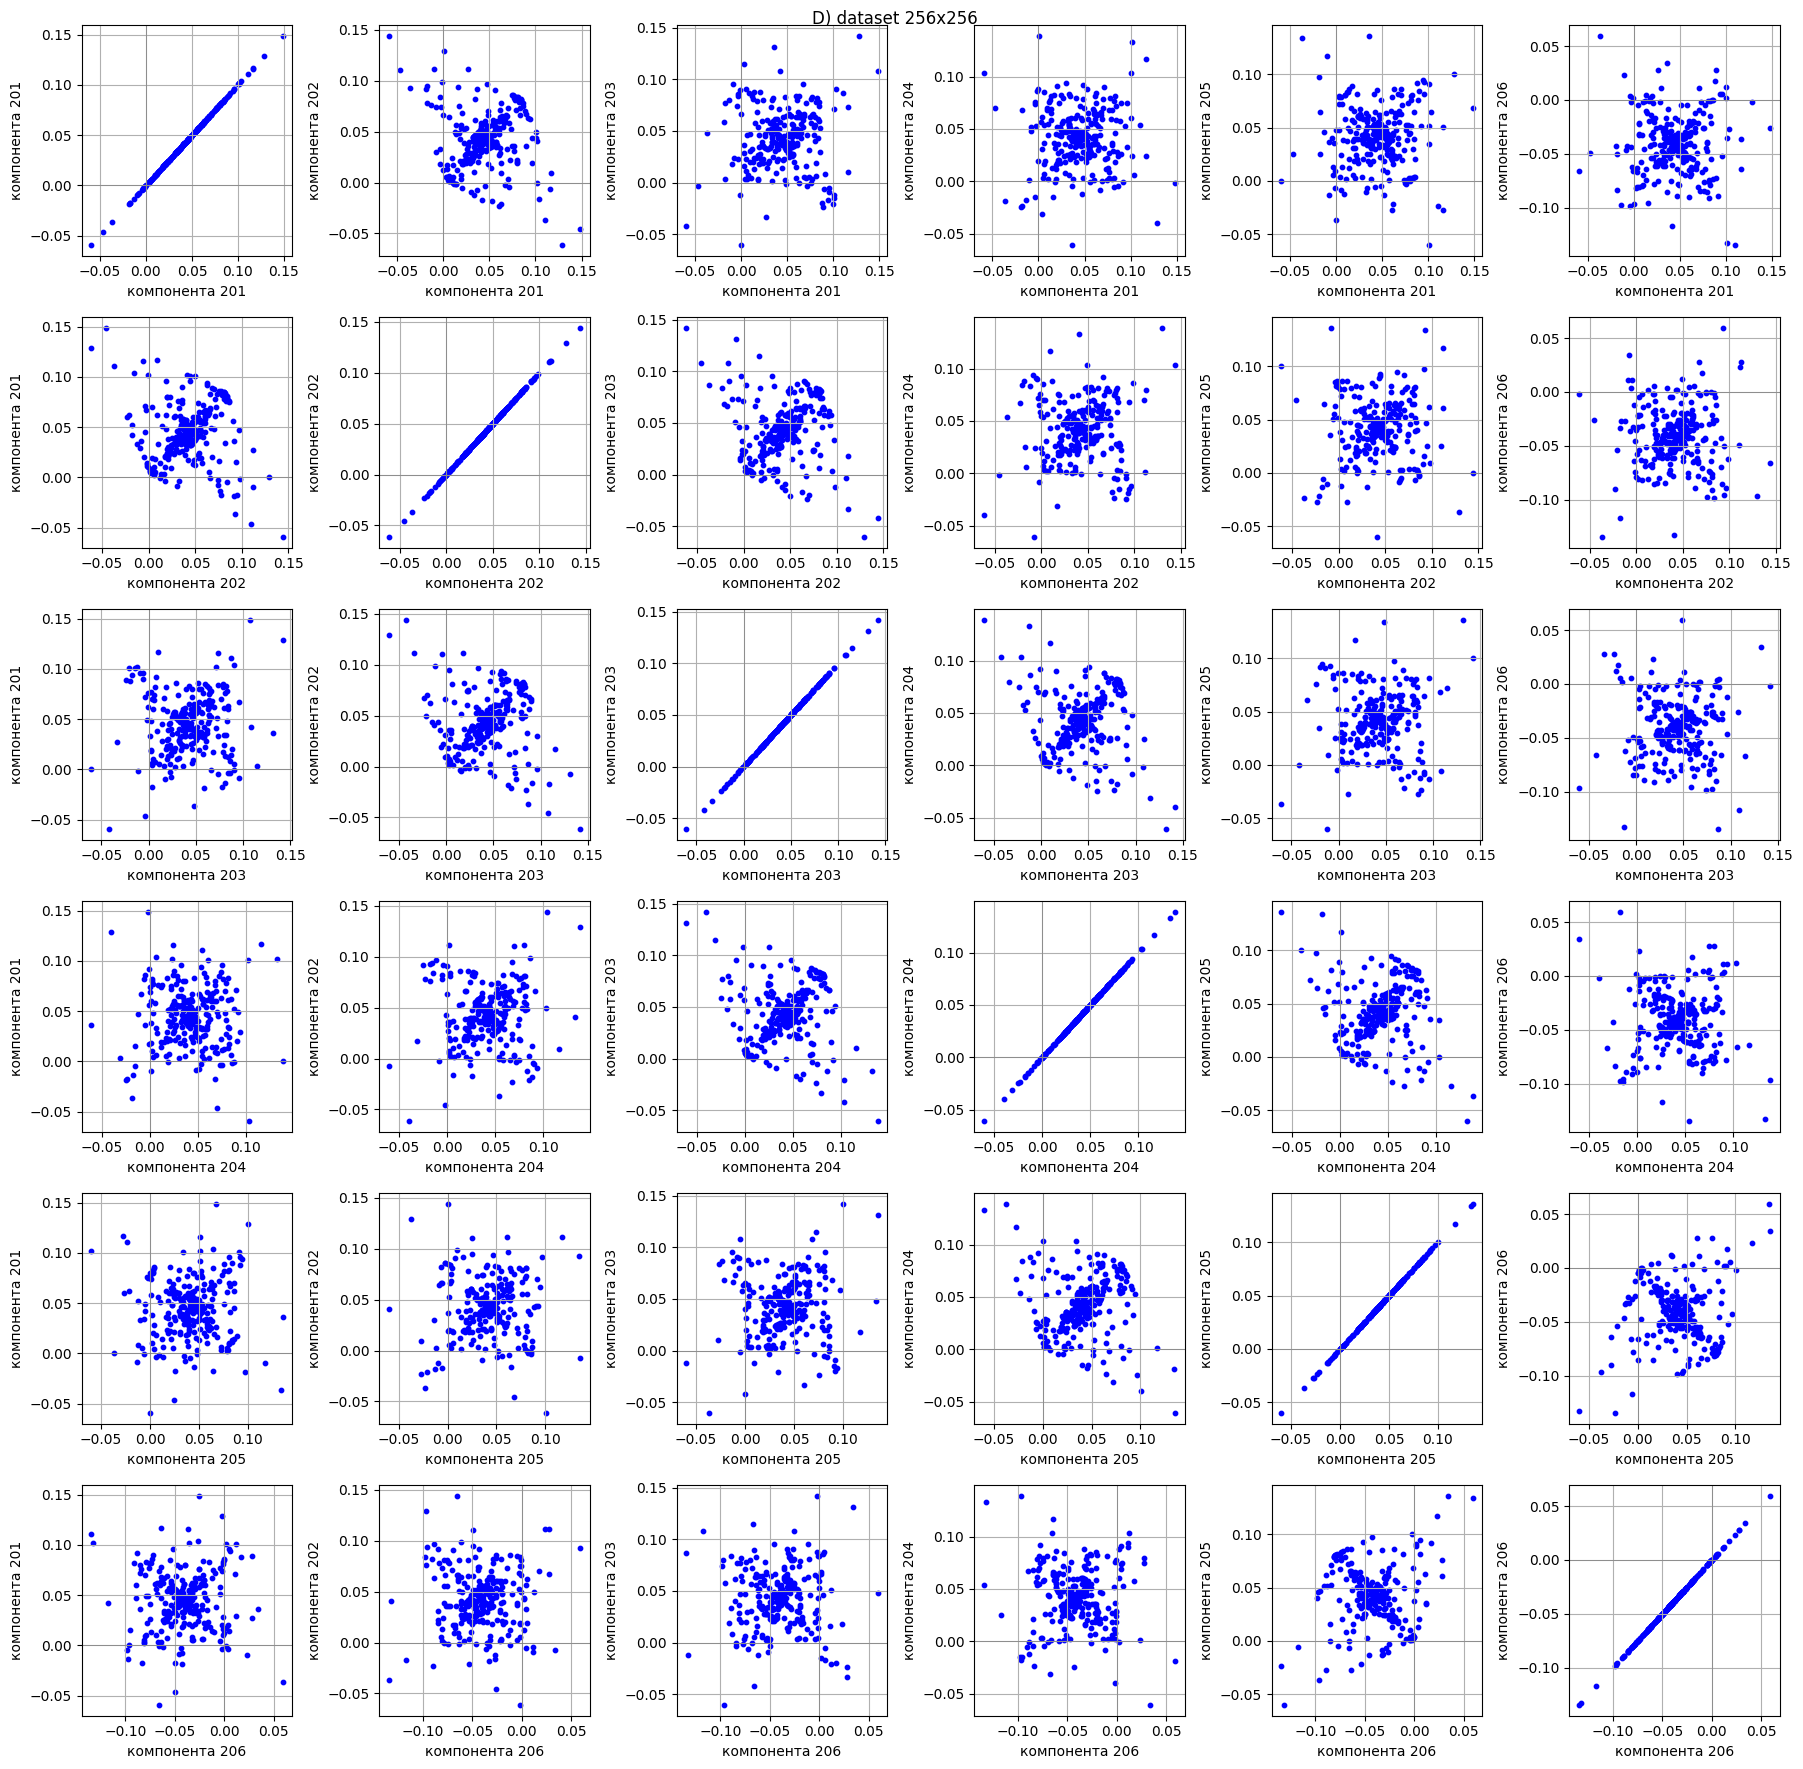

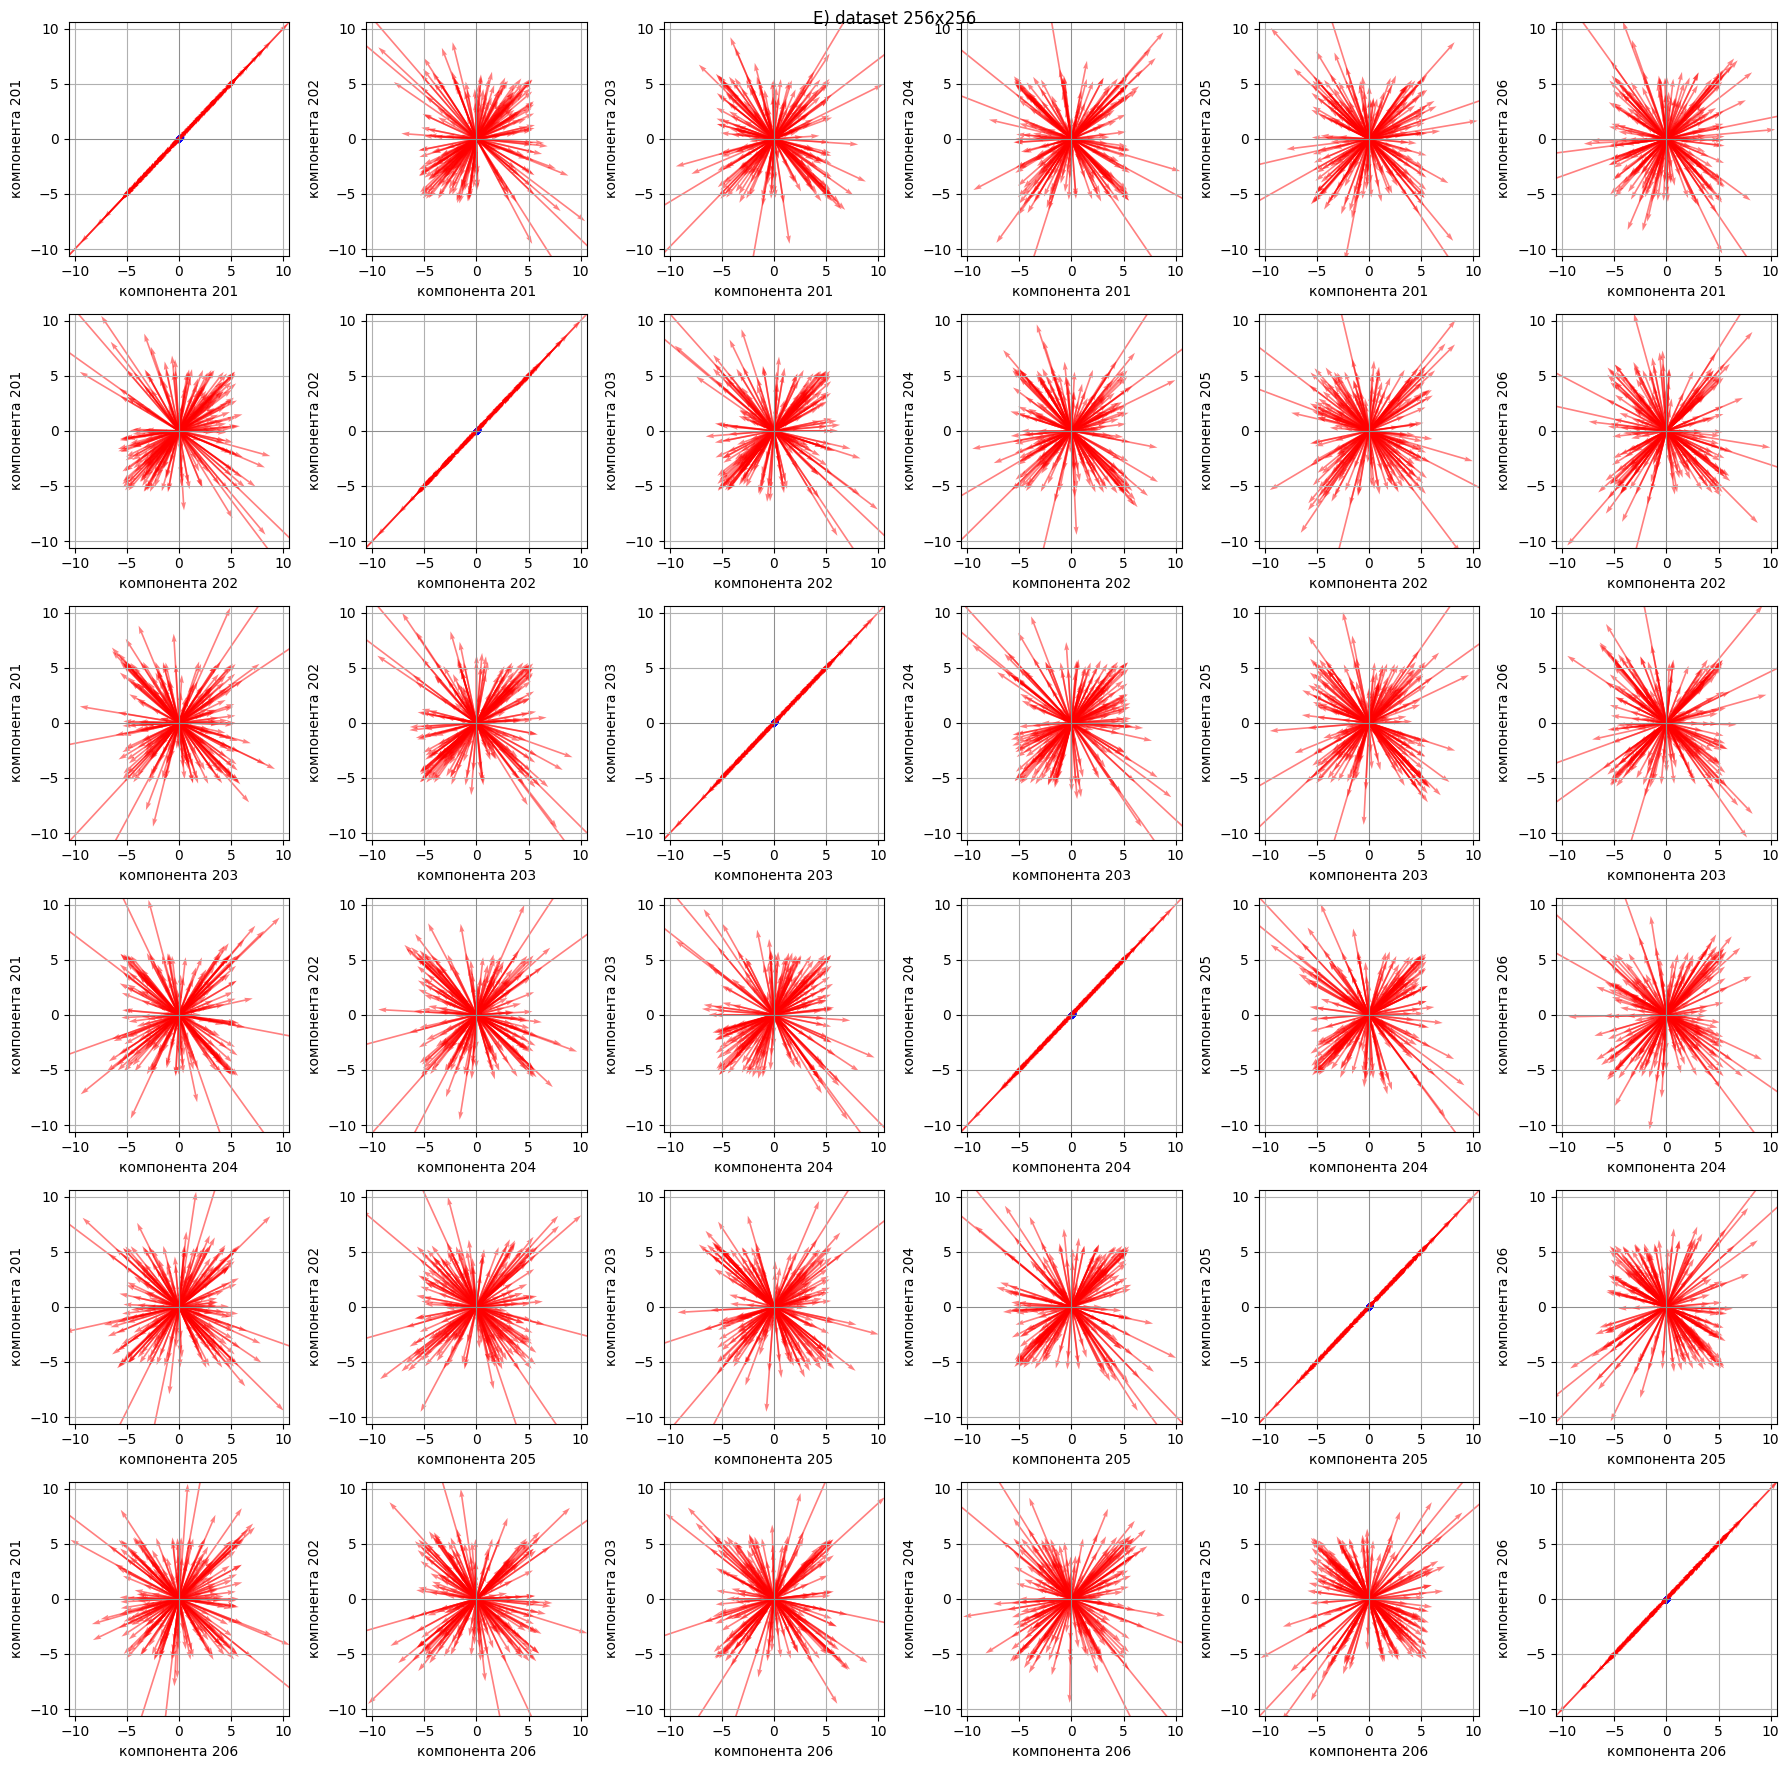

In [212]:
for name, dataset in datasets.items():
    print(f'dataset {name}x{name}')
    task_2(dataset, a = 6, c = 200)

# 3.

In [ ]:
import umap #pip install umap-learn
import pacman #pip install pacmap